# Importing All thr Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv("loan.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.Gender[df.Gender=='Male']=1
df.Gender[df.Gender=='Female']=0

<ipython-input-6-15f5640924bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender=='Male']=1
<ipython-input-6-15f5640924bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender=='Female']=0


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning

In [8]:
df.drop('Loan_ID',axis=1,inplace=True)

In [9]:
df.Married[df.Married=='Yes']=1
df.Married[df.Married=='No']=0

<ipython-input-9-46214df05fa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Married[df.Married=='Yes']=1
<ipython-input-9-46214df05fa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Married[df.Married=='No']=0


In [10]:
df.Education[df.Education=='Graduate']=1
df.Education[df.Education=='Not Graduate']=0

df.Self_Employed[df.Self_Employed=='Yes']=1
df.Self_Employed[df.Self_Employed=='No']=0

<ipython-input-10-ddf39458ef89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Education[df.Education=='Graduate']=1
<ipython-input-10-ddf39458ef89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Education[df.Education=='Not Graduate']=0
<ipython-input-10-ddf39458ef89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Self_Employed[df.Self_Employed=='Yes']=1
<ipython-input-10-ddf39458ef89>:5: SettingWithCopyWarning: 
A valu

## Filling Null Values

In [11]:
df['Gender']=df['Gender'].fillna(0)
df['Married']=df['Married'].fillna(1)
df['Dependents']=df['Dependents'].fillna(0)
df['Self_Employed']=df['Self_Employed'].fillna(0)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(1)

In [12]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Label Encoding As Our Machine Learning Model Doesnt Accept Categorical Values

In [14]:
le = LabelEncoder()

In [15]:
df['Married']=le.fit_transform(df['Married'].astype(str))
df['Property_Area']=le.fit_transform(df['Property_Area'].astype(str))
df['Dependents']=le.fit_transform(df['Dependents'].astype(str))

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,Y


# Visualization\Eda

In [17]:
df.corr()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.336818,0.148500,-0.027421,0.013933,0.082316,0.064609,-0.070179,0.021612,-0.017054
Married,0.336818,1.000000,0.334216,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257
Dependents,0.148500,0.334216,1.000000,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244
Self_Employed,-0.027421,0.004489,0.056798,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860
ApplicantIncome,0.013933,0.051708,0.118202,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500
CoapplicantIncome,0.082316,0.075948,0.030430,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522
LoanAmount,0.064609,0.147141,0.163106,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776
Loan_Amount_Term,-0.070179,-0.100863,-0.101054,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620
Credit_History,0.021612,0.010938,-0.040160,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963
Property_Area,-0.017054,0.004257,-0.000244,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,0.001963,1.000000


<AxesSubplot:>

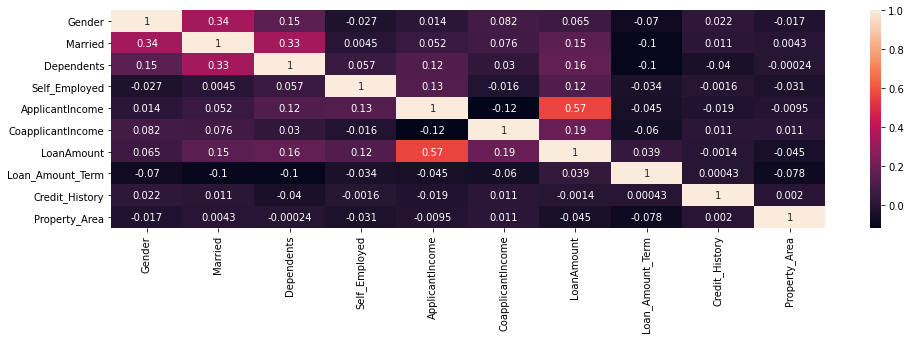

In [25]:
#heatmap

plt.figure(figsize=(16,4))
sns.heatmap(df.corr(),annot  = True)

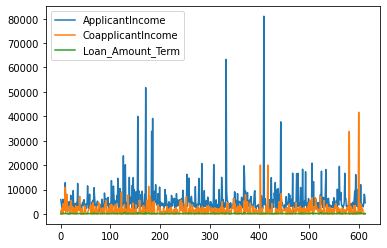

In [116]:

plt.plot(df.ApplicantIncome,label='ApplicantIncome')
plt.plot(df.CoapplicantIncome,label='CoapplicantIncome')
plt.plot(df.LoanAmount,label='Loan_Amount_Term')
plt.legend()

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


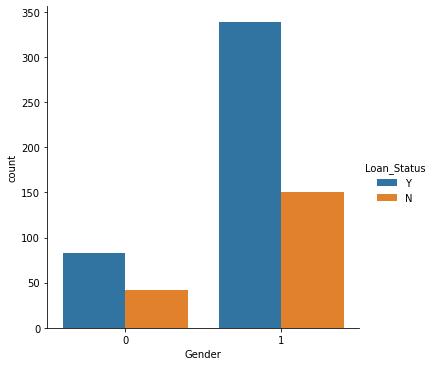

In [117]:

sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


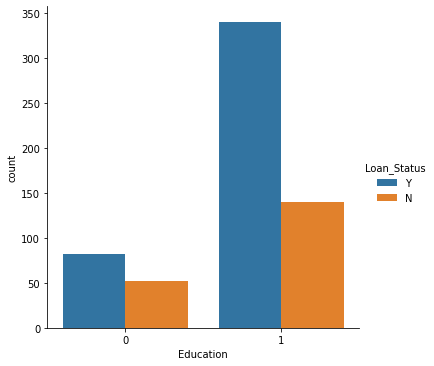

In [118]:
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


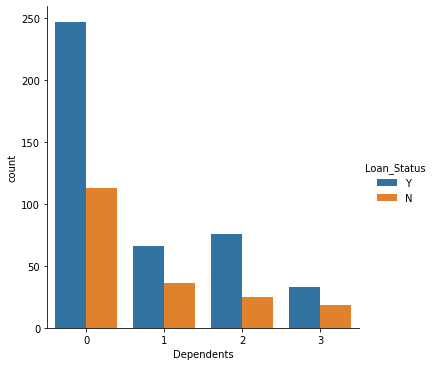

In [119]:
sns.factorplot('Dependents',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


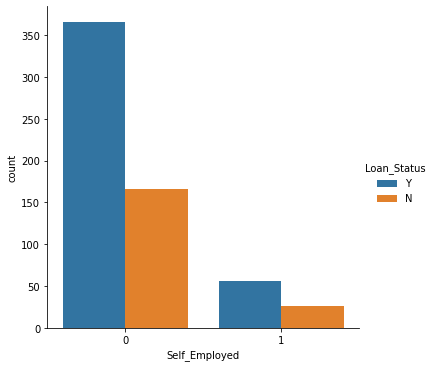

In [120]:
sns.factorplot('Self_Employed',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


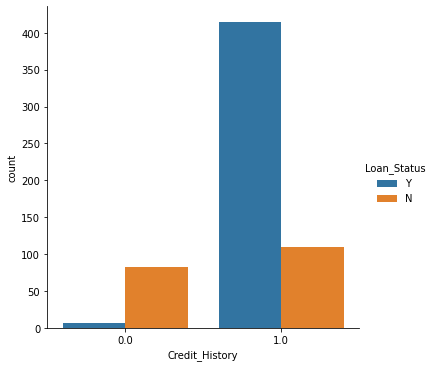

In [121]:
sns.factorplot('Credit_History',kind='count',data=df,hue='Loan_Status')

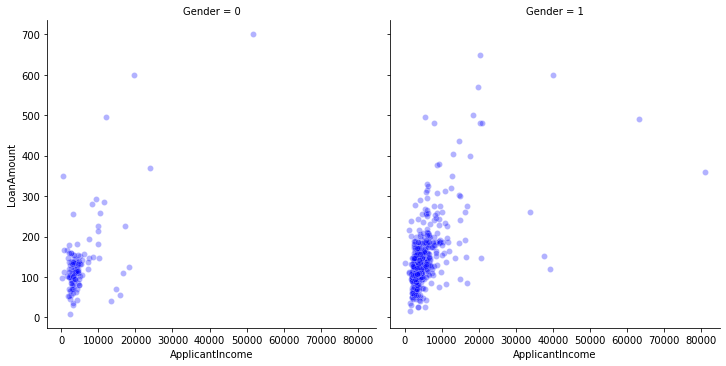

In [122]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", data=df, col="Gender",color="Blue",alpha=0.3)
plt.show()

# Splitting Our Data Into Training and Testing Data

In [123]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

# Model Fitting

In [124]:
model = RandomForestClassifier(n_jobs=-1)

In [125]:
model.fit(Xtrain,ytrain)

RandomForestClassifier(n_jobs=-1)

In [126]:
# Got ThE CoDE From internet
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [127]:
pred = model.predict(Xtest)

In [128]:
model.base_estimator_

DecisionTreeClassifier()

In [129]:
cf = confusion_matrix(ytest,pred)
cf

array([[ 27,  34],
       [  6, 118]], dtype=int64)

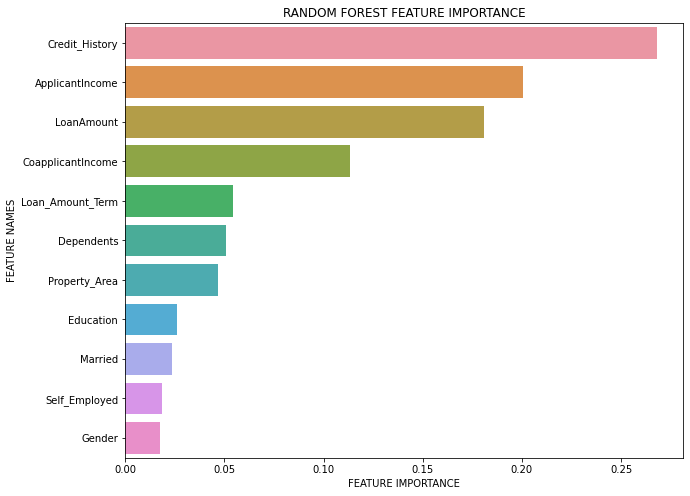

In [130]:
plot_feature_importance(model.feature_importances_, X.columns, 'RANDOM FOREST')

## Checking Accuracy

In [158]:
result = model.score(Xtest, ytest)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 78.378%


In [159]:
print("Classification Report for Random Forest Classifier")
print(classification_report(ytest, pred))

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           N       0.82      0.44      0.57        61
           Y       0.78      0.95      0.86       124

    accuracy                           0.78       185
   macro avg       0.80      0.70      0.71       185
weighted avg       0.79      0.78      0.76       185



## Fitting Support Vector Machine

In [160]:
svc_model = SVC()

In [161]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [162]:
svc_model.fit(Xtrain,ytrain)

SVC()

In [163]:
pred_svc = svc_model.predict(Xtest)

In [164]:
cm = confusion_matrix(ytest,pred_svc)
cm


array([[  1,  60],
       [  1, 123]], dtype=int64)

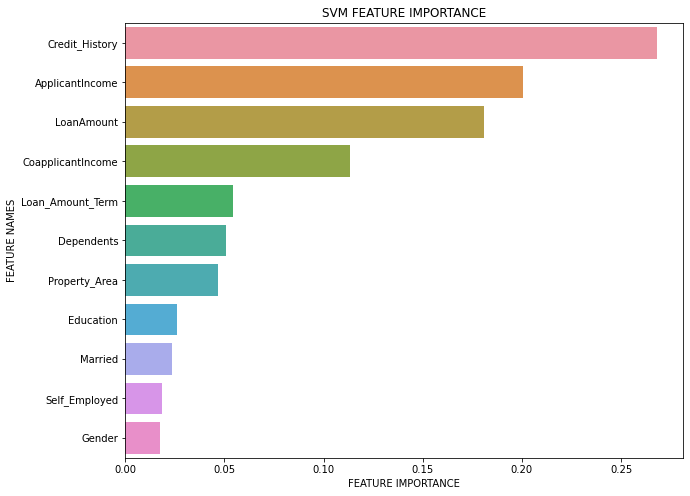

In [165]:
plot_feature_importance(model.feature_importances_, X.columns, 'SVM')

In [166]:
print("Accuracy",metrics.accuracy_score(ytest,pred))

Accuracy 0.7837837837837838


In [167]:
classifiers = {
    'Linear SVM': SVC(kernel='linear'),
    'RBF SVM': SVC(kernel='rbf'),
    'Sigmoid SVM': SVC(kernel='sigmoid'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [168]:
acc_scores = dict()

for classifier in classifiers:
    
    clf = classifiers[classifier]
    clf.fit(Xtrain,ytrain)
    y_pred = clf.predict(Xtest)
    acc_scores[classifier] = accuracy_score(y_pred, ytest)
    print(classifier, acc_scores[classifier])

Linear SVM 0.7837837837837838
RBF SVM 0.6702702702702703
Sigmoid SVM 0.5945945945945946
Decision Tree 0.6972972972972973
Random Forest 0.7783783783783784
Gradient Boosting 0.7837837837837838
Logistic Regression 0.7891891891891892


D:\anaconda3\envs\python version38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
